### This notebook uses the Auto ARIMA function along the SARIMA Forecasting model to forecast prices for the next 2 years based on 10-year historical data.

#### Please tun the next cell to import all libraries used in this notebook.

In [2]:
!pip install pmdarima

     -------------------------------------- 613.3/613.3 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 60.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
# Load the data
file_path = 'Scripts/livestock_commodity.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()


,Date,LIVE CATTLE,LEAN HOGS
0,3/1/00,69.700,55.975
1,4/1/00,69.075,55.625
2,5/1/00,68.975,55.075
3,6/1/00,70.075,55.175
4,7/1/00,70.875,55.625


#### The errors in the next 3 cells will be corrected after running the 3rd cell, however, this error will only occur if the Date is not in the proper datetime format. 

Ensure the file follows the following format "d-m-y" & the file has no missing values.

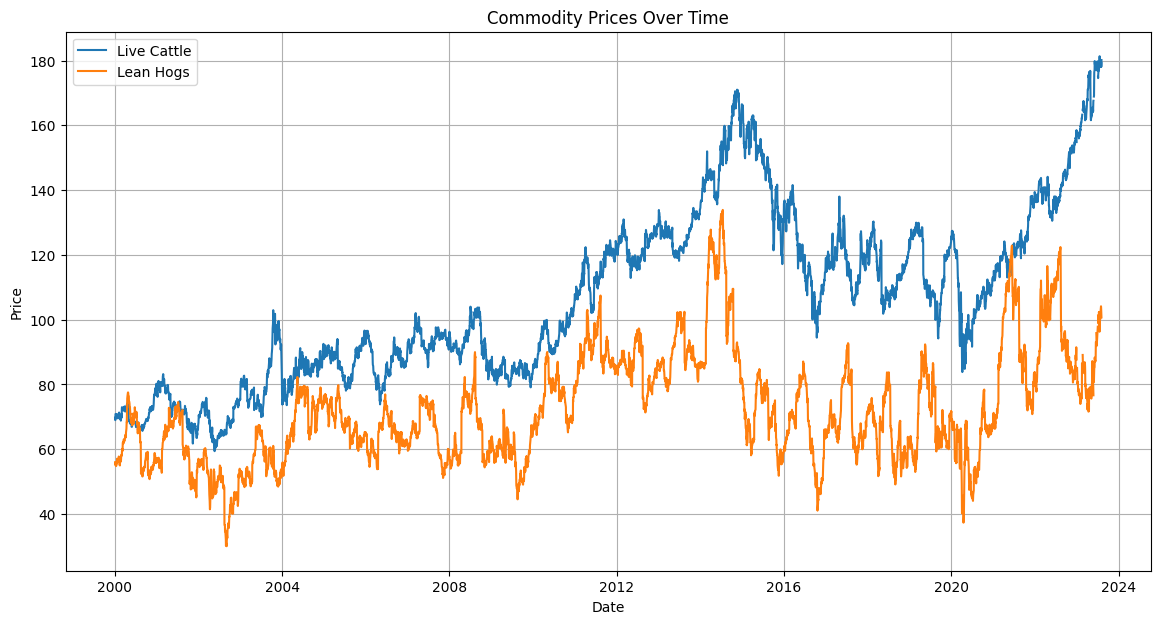

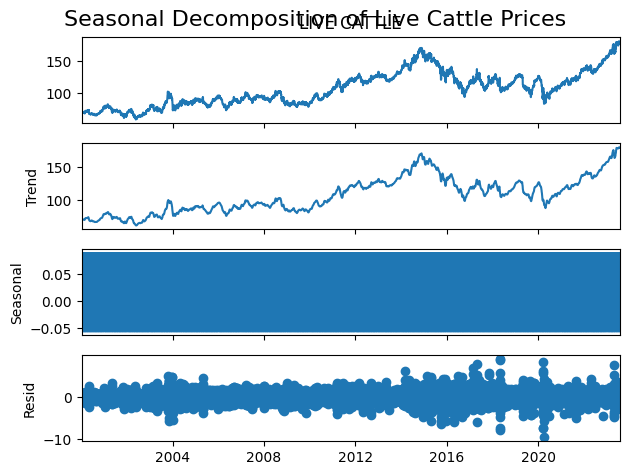

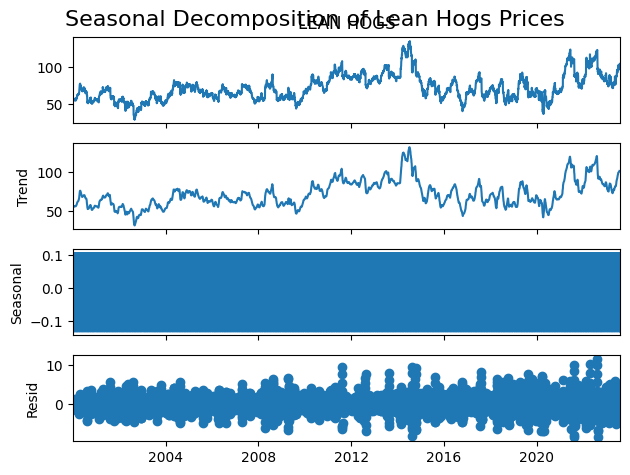

In [25]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')
data.set_index('Date', inplace=True)

# def parse_dates(date_str):
#     for fmt in ('%m/%d/%y', '%d/%m/%y'):
#         try:
#             return pd.to_datetime(date_str, format=fmt)
#         except ValueError:
#             continue
#     raise ValueError(f"no valid date format found for {date_str}")

# # Apply the function to the Date column
# data['Date'] = data['Date'].apply(parse_dates)
# data.set_index('Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(data['LIVE CATTLE'], label='Live Cattle')
plt.plot(data['LEAN HOGS'], label='Lean Hogs')
plt.title('Commodity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Perform seasonal decomposition
data = data.dropna(subset=['LIVE CATTLE', 'LEAN HOGS'])

decompose_result_cattle = seasonal_decompose(data['LIVE CATTLE'], model='additive', period=12)
decompose_result_hogs = seasonal_decompose(data['LEAN HOGS'], model='additive', period=12)

# Plot the seasonal decomposition results
decompose_result_cattle.plot()
plt.suptitle('Seasonal Decomposition of Live Cattle Prices', fontsize=16)
plt.show()

decompose_result_hogs.plot()
plt.suptitle('Seasonal Decomposition of Lean Hogs Prices', fontsize=16)
plt.show()


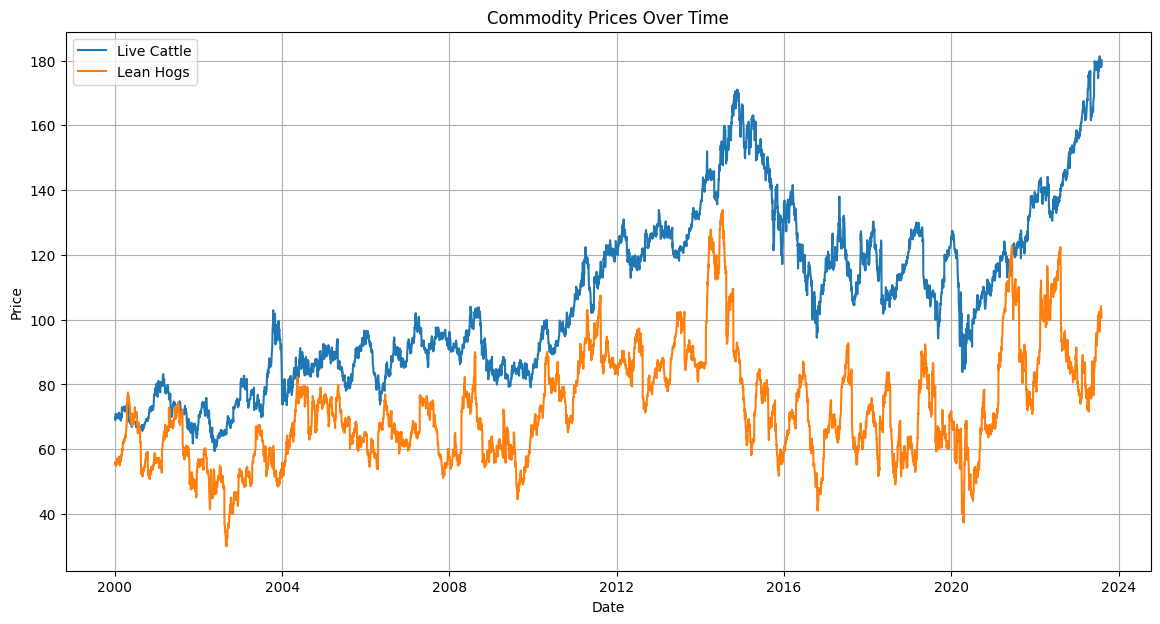

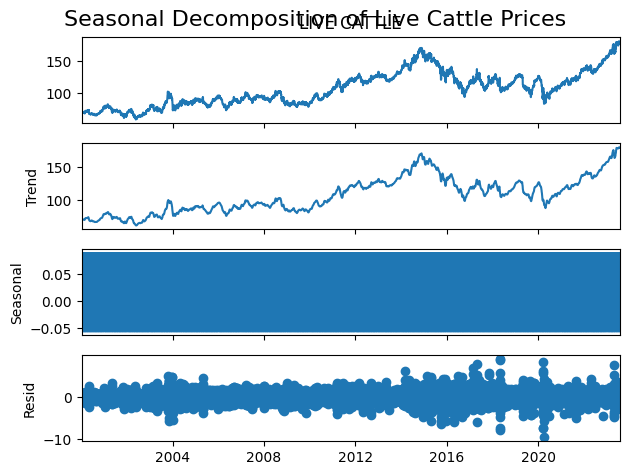

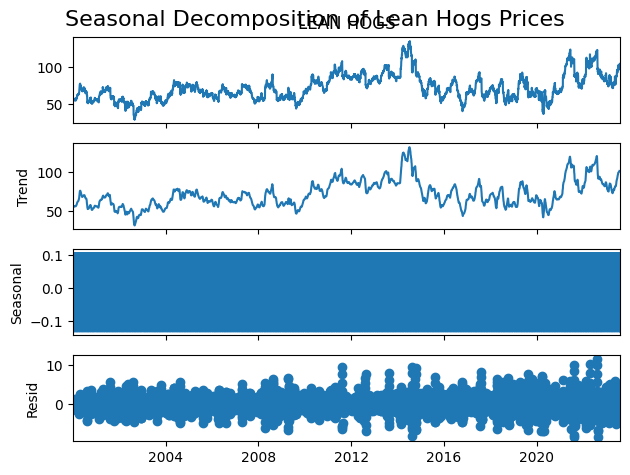

In [26]:
# Function to parse dates
# def parse_dates(date_str):
#     for fmt in ('%m/%d/%y', '%d/%m/%y'):
#         try:
#             return pd.to_datetime(date_str, format=fmt)
#         except ValueError:
#             continue
#     raise ValueError(f"no valid date format found for {date_str}")

# # Apply the function to the Date column
# data['Date'] = data['Date'].apply(parse_dates)
# data.set_index('Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(data['LIVE CATTLE'], label='Live Cattle')
plt.plot(data['LEAN HOGS'], label='Lean Hogs')
plt.title('Commodity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Perform seasonal decomposition
decompose_result_cattle = seasonal_decompose(data['LIVE CATTLE'], model='additive', period=12)
decompose_result_hogs = seasonal_decompose(data['LEAN HOGS'], model='additive', period=12)

# Plot the seasonal decomposition results
decompose_result_cattle.plot()
plt.suptitle('Seasonal Decomposition of Live Cattle Prices', fontsize=16)
plt.show()

decompose_result_hogs.plot()
plt.suptitle('Seasonal Decomposition of Lean Hogs Prices', fontsize=16)
plt.show()


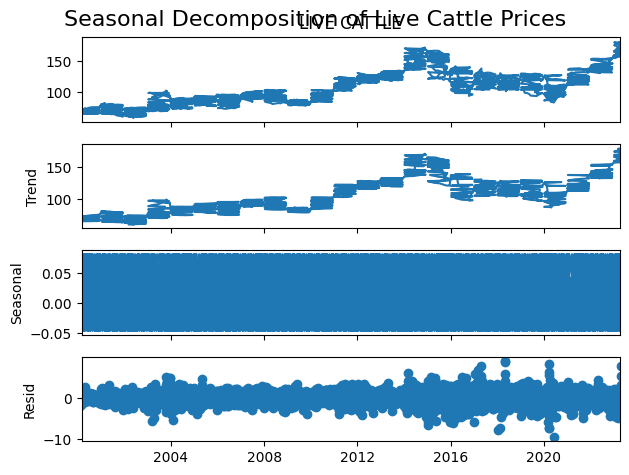

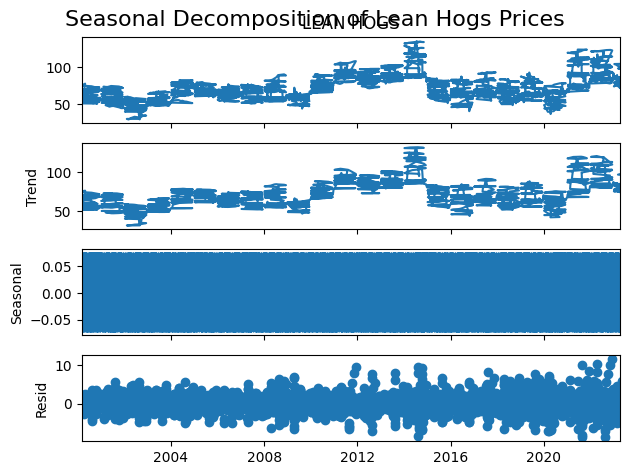

In [13]:
# Handle missing values by forward-filling
# data.fillna(method='ffill', inplace=True)

# Perform seasonal decomposition
# decompose_result_cattle = seasonal_decompose(data['LIVE CATTLE'], model='additive', period=12)
# decompose_result_hogs = seasonal_decompose(data['LEAN HOGS'], model='additive', period=12)

# # Plot the seasonal decomposition results
# decompose_result_cattle.plot()
# plt.suptitle('Seasonal Decomposition of Live Cattle Prices', fontsize=16)
# plt.show()

# decompose_result_hogs.plot()
# plt.suptitle('Seasonal Decomposition of Lean Hogs Prices', fontsize=16)
# plt.show()


#### At this point, the SARIMA model is ready for exploration

C:\Users\Isaiah\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaiah\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaiah\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaiah\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequenc

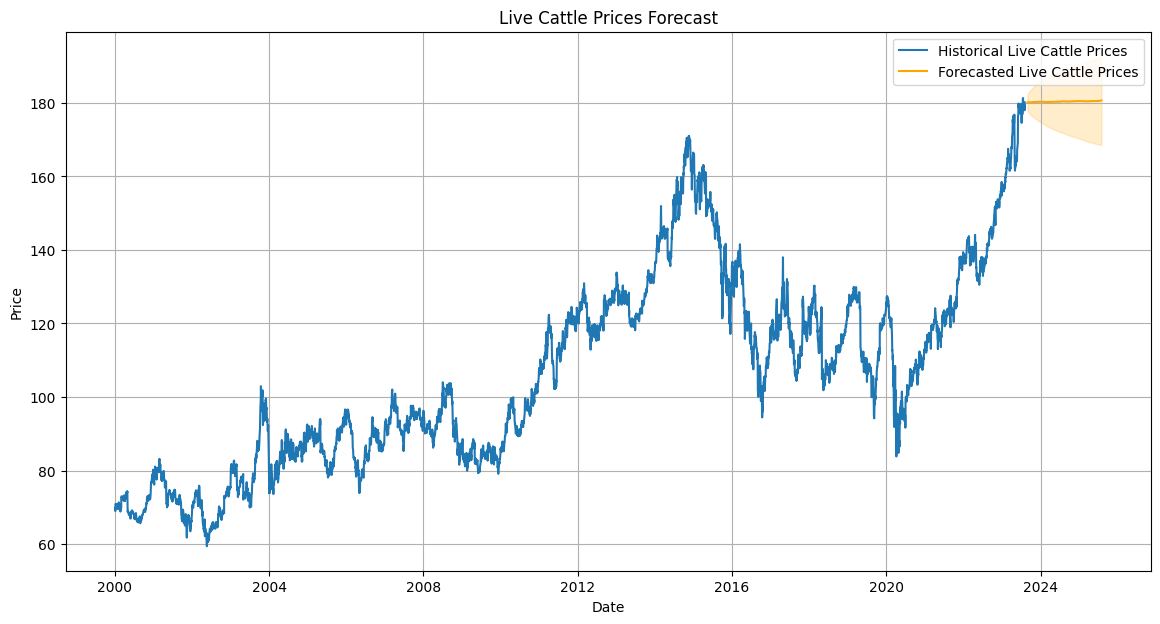

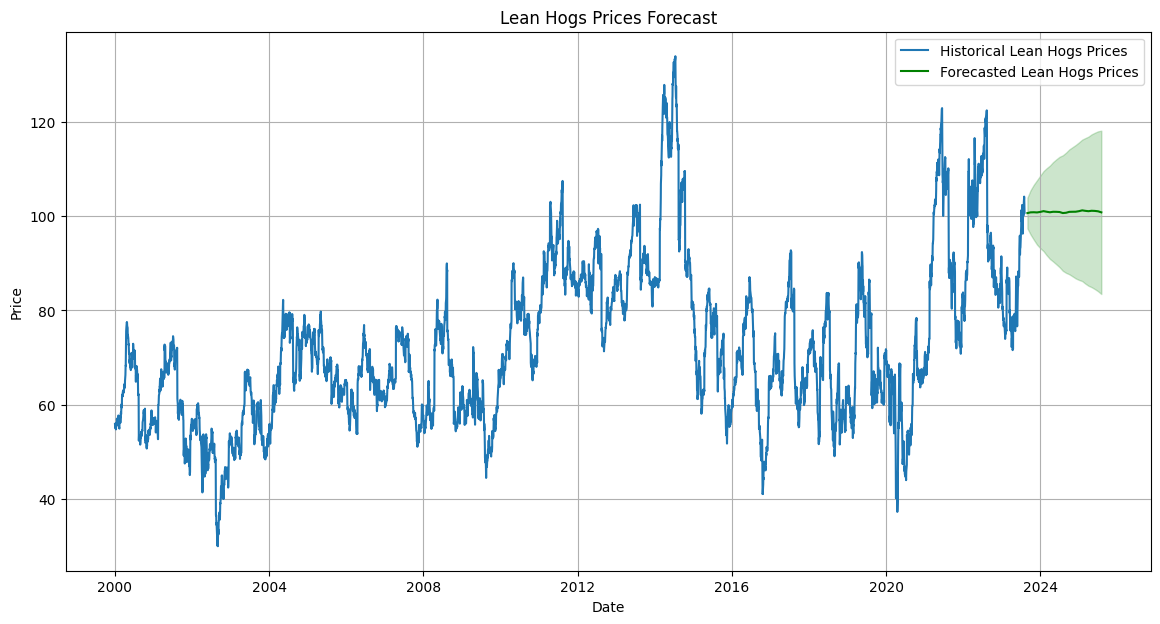

In [27]:
# Define the SARIMA model configuration
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Fit the SARIMA model for Live Cattle
sarima_cattle = SARIMAX(data['LIVE CATTLE'], order=order, seasonal_order=seasonal_order)
sarima_cattle_fit = sarima_cattle.fit(disp=False)

# Fit the SARIMA model for Lean Hogs
sarima_hogs = SARIMAX(data['LEAN HOGS'], order=order, seasonal_order=seasonal_order)
sarima_hogs_fit = sarima_hogs.fit(disp=False)

# Forecast future values (next 24 months)
forecast_steps = 24
cattle_forecast = sarima_cattle_fit.get_forecast(steps=forecast_steps)
cattle_forecast_ci = cattle_forecast.conf_int()

hogs_forecast = sarima_hogs_fit.get_forecast(steps=forecast_steps)
hogs_forecast_ci = hogs_forecast.conf_int()

# Create the forecast dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')

# Plot the forecasts along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(data['LIVE CATTLE'], label='Historical Live Cattle Prices')
plt.plot(forecast_dates, cattle_forecast.predicted_mean, label='Forecasted Live Cattle Prices', color='orange')
plt.fill_between(forecast_dates, cattle_forecast_ci.iloc[:, 0], cattle_forecast_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.title('Live Cattle Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(data['LEAN HOGS'], label='Historical Lean Hogs Prices')
plt.plot(forecast_dates, hogs_forecast.predicted_mean, label='Forecasted Lean Hogs Prices', color='green')
plt.fill_between(forecast_dates, hogs_forecast_ci.iloc[:, 0], hogs_forecast_ci.iloc[:, 1], color='green', alpha=0.2)
plt.title('Lean Hogs Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


#### We note that the graph above take data points of every day in the past 20 years, we will only take the monthly average of the last 20 years. Our datapoints will decrease from ~7305 to ~240 data points to forecast prices in the next 24 months

From earlier observations, the SARIMA model does not function properly when it has too many datapoints in a month, as such taking the average monthly prices over 20 years makes the dataset less noisy and more easier for SARIMA to take in and perform the model building

#### This section onwards using Auto ARIMA to determine the best ARIMA parameter to forecast the next 2 years of data, using 10-year historical data.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=837.252, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1050.952, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=845.029, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=933.108, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1407.116, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=839.028, Time=0.23 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=838.139, Time=0.75 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=838.374, Time=2.47 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=839.173, Time=0.81 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=840.144, Time=0.10 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=838.909, Time=0.27 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=838.241, Time=0.64 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=833.267, Time=0.35 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept 

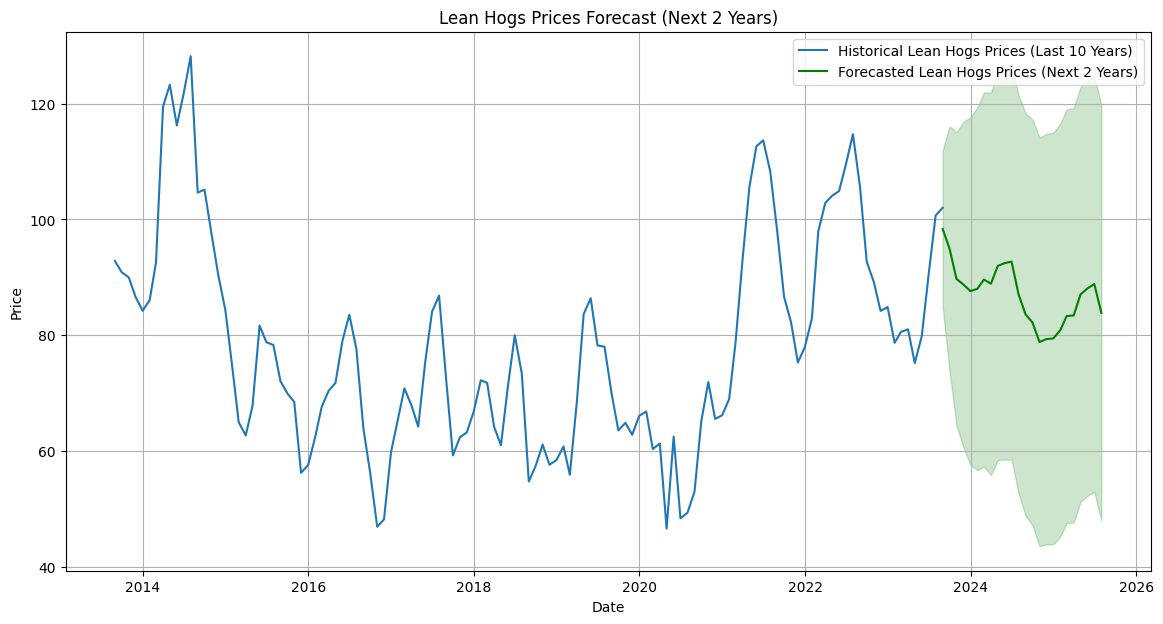

In [31]:
# Filter the data for the last 10 years
monthly_data = data.resample('M').mean()
end_date = monthly_data.index[-1]
start_date = end_date - pd.DateOffset(years=10)
filtered_data = monthly_data.loc[start_date:end_date]

# Fit auto_arima model on the filtered data
model_hogs = pm.auto_arima(filtered_data['LEAN HOGS'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Forecast future values (next 24 months, i.e., 2 years)
forecast_steps = 24

hogs_forecast = model_hogs.predict(n_periods=forecast_steps, return_conf_int=True)

# Extract forecast values and confidence intervals
hogs_forecast_mean, hogs_forecast_ci = hogs_forecast

# Create the forecast dates
forecast_dates = pd.date_range(start=filtered_data.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')

plt.figure(figsize=(14, 7))
plt.plot(filtered_data['LEAN HOGS'], label='Historical Lean Hogs Prices (Last 10 Years)', color='blue')
plt.plot(forecast_dates, hogs_forecast_mean, label='Forecasted Lean Hogs Prices (Next 2 Years)', color='green')
plt.fill_between(forecast_dates, hogs_forecast_ci[:, 0], hogs_forecast_ci[:, 1], color='green', alpha=0.2)
plt.title('Lean Hogs Prices Forecast (Next 2 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#### This section onwards is to adjust the plot and chart for Lean Hogs

C:\Users\Isaiah\AppData\Local\Temp\ipykernel_18028\3340342974.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_forecast_mean = pd.Series([filtered_data['LEAN HOGS'].iloc[-1]]).append(pd.Series(hogs_forecast_mean))
C:\Users\Isaiah\AppData\Local\Temp\ipykernel_18028\3340342974.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_forecast_ci_lower = pd.Series([filtered_data['LEAN HOGS'].iloc[-1]]).append(pd.Series(hogs_forecast_ci[:, 0]))
C:\Users\Isaiah\AppData\Local\Temp\ipykernel_18028\3340342974.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_forecast_ci_upper = pd.Series([filtered_data['LEAN HOGS'].iloc[-1]]).append(pd.Series(hogs_forecast_ci[:, 1]))


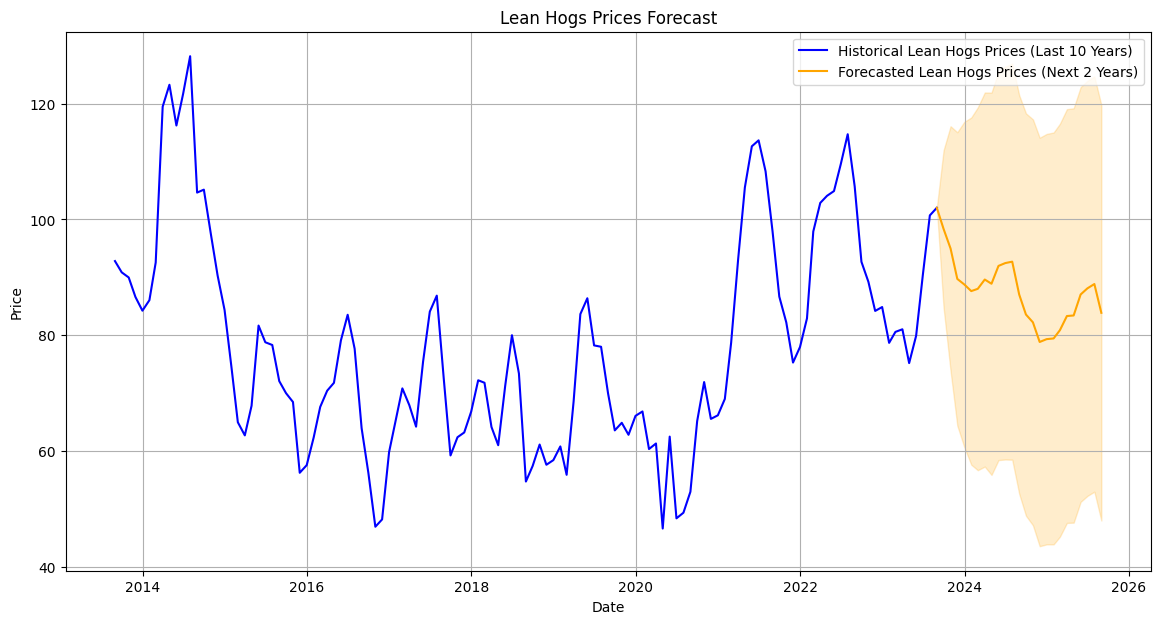

In [54]:
# Create the forecast dates
forecast_dates = pd.date_range(start=filtered_data.index[-1], periods=forecast_steps+1, freq='M')[1:]

# Combine the last historical value with the forecast values for smooth transition
combined_forecast_mean = pd.Series([filtered_data['LEAN HOGS'].iloc[-1]]).append(pd.Series(hogs_forecast_mean))
combined_forecast_ci_lower = pd.Series([filtered_data['LEAN HOGS'].iloc[-1]]).append(pd.Series(hogs_forecast_ci[:, 0]))
combined_forecast_ci_upper = pd.Series([filtered_data['LEAN HOGS'].iloc[-1]]).append(pd.Series(hogs_forecast_ci[:, 1]))

# Combine historical and forecast data for plotting
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['LEAN HOGS'], label='Historical Lean Hogs Prices (Last 10 Years)', color='blue')
plt.plot(forecast_dates.insert(0, filtered_data.index[-1]), combined_forecast_mean, label='Forecasted Lean Hogs Prices (Next 2 Years)', color='orange')
plt.fill_between(forecast_dates.insert(0, filtered_data.index[-1]), combined_forecast_ci_lower, combined_forecast_ci_upper, color='orange', alpha=0.2)
plt.title('Lean Hogs Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### This section writes the forecasted values into a CSV file

In [58]:
# Create a DataFrame for the forecasted data
forecast_dates = pd.date_range(start=filtered_data.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Lean Hogs Forecasted Monthly Average': hogs_forecast_mean
})

# Save historical data
historical_df.to_csv('historical_lean_hogs.csv', index=False)

# Save forecasted data
forecast_df.to_csv('forecasted_lean_hogs.csv', index=False)

# If you want to combine both in one file:
combined_df = pd.concat([historical_df, forecast_df], ignore_index=True)
combined_df.to_csv('combined_lean_hogs.csv', index=False)


Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=966.632, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=707.902, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=857.573, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=966.725, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=737.527, Time=0.02 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=968.422, Time=0.52 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=703.861, Time=0.97 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=727.499, Time=0.18 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.41 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=857.575, Time=0.76 sec
 ARIMA(1,0,2)(1,1,0)[12] intercept   : AIC=704.611, T

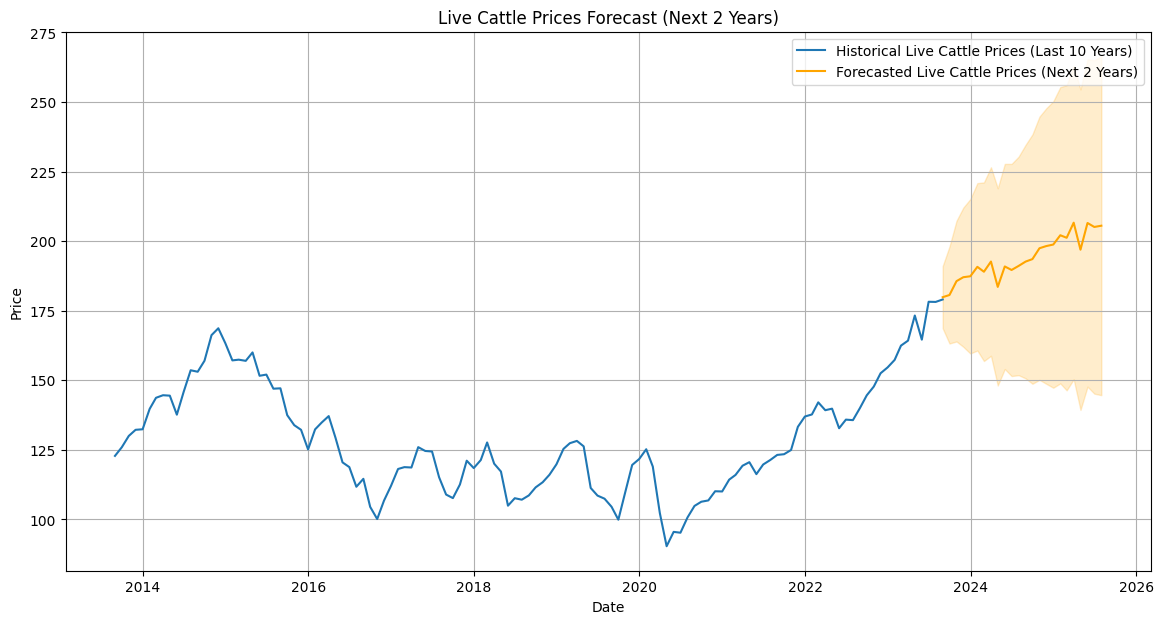

In [41]:
# Filter the data for the last 10 years
end_date = monthly_data.index[-1]
start_date = end_date - pd.DateOffset(years=10)
filtered_data = monthly_data.loc[start_date:end_date]

# Fit auto_arima model on the filtered data with specific ARIMA parameters
model_cattle = pm.auto_arima(filtered_data['LIVE CATTLE'], seasonal=True, m=12,
                             start_p=1, start_q=2, max_p=1, max_q=2, start_P=1, start_Q=1, max_P=1, max_Q=1,
                             d=0, D=1, trace=True, error_action='ignore', suppress_warnings=True,
                             stepwise=True, enforce_stationarity=False, enforce_invertibility=False)

# Forecast future values (next 24 months, i.e., 2 years)
forecast_steps = 24
cattle_forecast = model_cattle.predict(n_periods=forecast_steps, return_conf_int=True)

# Extract forecast values and confidence intervals
cattle_forecast_mean, cattle_forecast_ci = cattle_forecast

# Create the forecast dates
forecast_dates = pd.date_range(start=filtered_data.index[-1], periods=forecast_steps, freq='M')

# Plot the forecasts along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['LIVE CATTLE'], label='Historical Live Cattle Prices (Last 10 Years)')
plt.plot(forecast_dates, cattle_forecast_mean, label='Forecasted Live Cattle Prices (Next 2 Years)', color='orange')
plt.fill_between(forecast_dates, cattle_forecast_ci[:, 0], cattle_forecast_ci[:, 1], color='orange', alpha=0.2)
plt.title('Live Cattle Prices Forecast (Next 2 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


#### This section enforces a specific SARIMA Parameter with the help of SARIMAX, only tweak if the pmdarima (auto arima) yields a parameter you want to use.

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=966.632, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=707.902, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=857.573, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=966.725, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=737.527, Time=0.02 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=968.422, Time=0.07 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=703.861, Time=0.16 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=727.499, Time=0.06 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=857.575, Time=0.17 sec
 ARIMA(1,0,2)(1,1,0)[12] intercept   : AIC=704.611, T

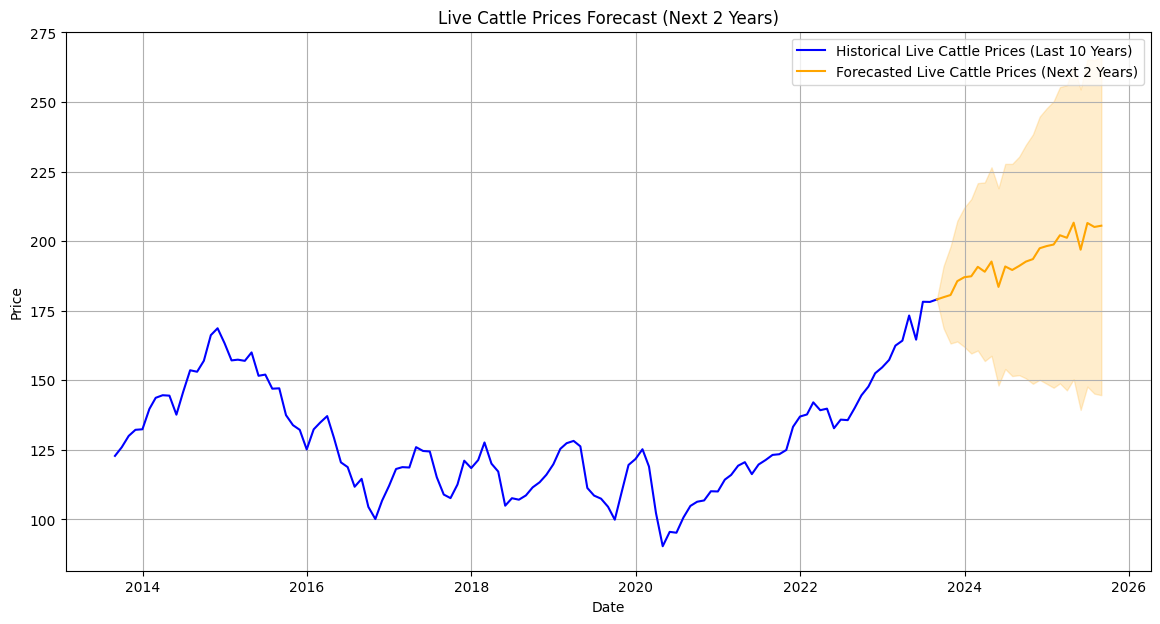

In [47]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'LIVE CATTLE' prices.

# Resample the data to monthly frequency
monthly_data = data.resample('M').mean()

# Filter the data for the last 10 years
end_date = monthly_data.index[-1]
start_date = end_date - pd.DateOffset(years=10)
filtered_data = monthly_data.loc[start_date:end_date]

# Fit auto_arima model on the filtered data
model_cattle = pm.auto_arima(filtered_data['LIVE CATTLE'], seasonal=True, m=12,
                             start_p=1, start_q=2, max_p=1, max_q=2, start_P=1, start_Q=1, max_P=1, max_Q=1,
                             d=0, D=1, trace=True, error_action='ignore', suppress_warnings=True,
                             stepwise=True, enforce_stationarity=False, enforce_invertibility=False)

# Forecast future values (next 24 months, i.e., 2 years)
forecast_steps = 24
cattle_forecast = model_cattle.predict(n_periods=forecast_steps, return_conf_int=True)

# Extract forecast values and confidence intervals
cattle_forecast_mean, cattle_forecast_ci = cattle_forecast

# Create the forecast dates
forecast_dates = pd.date_range(start=filtered_data.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')

# Combine the last historical value with the forecast values for smooth transition
combined_forecast_mean = pd.concat([filtered_data['LIVE CATTLE'].iloc[-1:], pd.Series(cattle_forecast_mean)], ignore_index=True)
combined_forecast_ci_lower = pd.concat([filtered_data['LIVE CATTLE'].iloc[-1:], pd.Series(cattle_forecast_ci[:, 0])], ignore_index=True)
combined_forecast_ci_upper = pd.concat([filtered_data['LIVE CATTLE'].iloc[-1:], pd.Series(cattle_forecast_ci[:, 1])], ignore_index=True)

# Create an extended forecast dates array
extended_forecast_dates = pd.date_range(start=filtered_data.index[-1], periods=forecast_steps+1, freq='M')

# Combine historical and forecast data for plotting
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['LIVE CATTLE'], label='Historical Live Cattle Prices (Last 10 Years)', color='blue')

# Plot the combined forecast data ensuring continuity
plt.plot(extended_forecast_dates, combined_forecast_mean, label='Forecasted Live Cattle Prices (Next 2 Years)', color='orange')
plt.fill_between(extended_forecast_dates, combined_forecast_ci_lower, combined_forecast_ci_upper, color='orange', alpha=0.2)

plt.title('Live Cattle Prices Forecast (Next 2 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


#### This section onwards is to adjust the plot and chart for Live Cattle

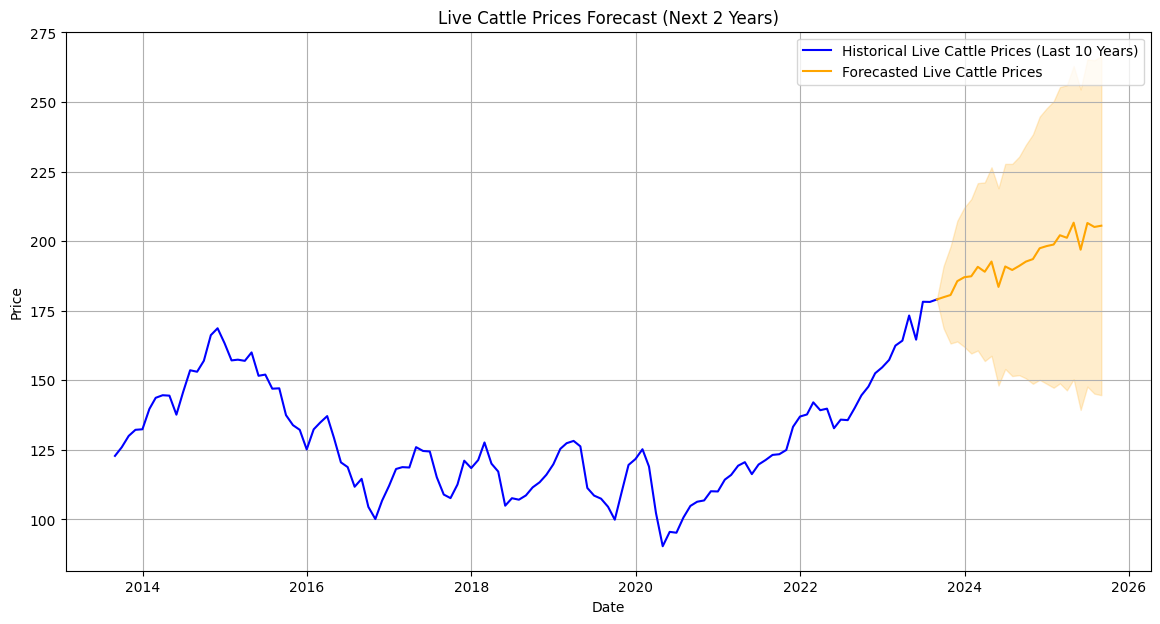

In [49]:
# Create the forecast dates
forecast_dates = pd.date_range(start=filtered_data.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')

# Combine the last historical value with the forecast values for smooth transition
combined_forecast_mean = pd.concat([filtered_data['LIVE CATTLE'].iloc[-1:], pd.Series(cattle_forecast_mean)], ignore_index=True)
combined_forecast_ci_lower = pd.concat([filtered_data['LIVE CATTLE'].iloc[-1:], pd.Series(cattle_forecast_ci[:, 0])], ignore_index=True)
combined_forecast_ci_upper = pd.concat([filtered_data['LIVE CATTLE'].iloc[-1:], pd.Series(cattle_forecast_ci[:, 1])], ignore_index=True)

# Create an extended forecast dates array
extended_forecast_dates = pd.date_range(start=filtered_data.index[-1], periods=forecast_steps+1, freq='M')

# Combine historical and forecast data for plotting
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['LIVE CATTLE'], label='Historical Live Cattle Prices (Last 10 Years)', color='blue')

# Plot the combined forecast data ensuring continuity
plt.plot(extended_forecast_dates, combined_forecast_mean, label='Forecasted Live Cattle Prices', color='orange')
plt.fill_between(extended_forecast_dates, combined_forecast_ci_lower, combined_forecast_ci_upper, color='orange', alpha=0.2)

plt.title('Live Cattle Prices Forecast (Next 2 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### This section writes the forecasted values into a CSV file

In [59]:
# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame({
    'Date': extended_forecast_dates,
    'Live Cattle Forecasted Monthly Average': combined_forecast_mean
})

# Save forecasted data
forecast_df.to_csv('forecasted_live_cattle.csv', index=False)

# If you want to combine both in one file:
combined_df = pd.concat([historical_df, forecast_df.iloc[1:]], ignore_index=True)  # Skip the duplicated last historical point
combined_df.to_csv('combined_live_cattle.csv', index=False)
